# MNIST dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Resources:
- (Yann Lecun)[http://yann.lecun.com/exdb/mnist/index.html]
- (Baeldung)[https://www.baeldung.com/cs/convolutional-vs-regular-nn]

In [47]:
# %pip install numpy
# %pip install keras
# %pip install tensorflow
# %pip install tabulate
# %pip install pillow
# %pip install matplotlib

In [48]:
# Primary Libraries
import numpy as np
from keras.datasets import mnist

In [49]:
# Visualization and Pretty Prints
from tabulate import tabulate
from PIL import Image
import matplotlib.pyplot as plt

## Data Exploration

In [50]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
# Print the shape of the training and test datasets
table = tabulate([
    ["Training data shape", x_train.shape, "28 x 28 pixels images"],
    ["Traning labels shape", y_train.shape, "numerical value (0-9)"],
    ["Test data shape:", x_test.shape, "28 x 28 pixel images"],
    ["Test labels shape:", y_test.shape, "numerical value (0-9)"]
], tablefmt='fancy_grid')

print(table)

╒══════════════════════╤═════════════════╤═══════════════════════╕
│ Training data shape  │ (60000, 28, 28) │ 28 x 28 pixels images │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Traning labels shape │ (60000,)        │ numerical value (0-9) │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Test data shape:     │ (10000, 28, 28) │ 28 x 28 pixel images  │
├──────────────────────┼─────────────────┼───────────────────────┤
│ Test labels shape:   │ (10000,)        │ numerical value (0-9) │
╘══════════════════════╧═════════════════╧═══════════════════════╛


In [52]:
image = Image.fromarray(x_train[0])

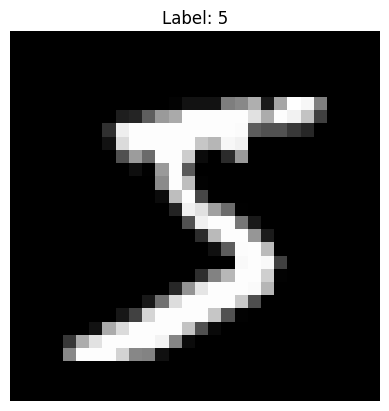

In [53]:
# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

## Preprocessing

For the MNIST dataset, we typically perform normalization to scale the pixel values to a range between 0 and 1, which helps improve the convergence of the neural network during training

This code snippet normalizes the pixel values of the training and test datasets by dividing them by 255.0, the maximum pixel value. As a result, the pixel values will be scaled to the range [0, 1].

In [54]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [67]:
# Print the minimum and maximum pixel values after normalization
table = tabulate([
    ["Minimum pixel value after normalization:", np.min(x_train)],
    ["Maximum pixel value after normalization:", np.max(x_train)],
    ["Mean pixel value after normalization:", np.mean(x_train)],
], tablefmt='fancy_grid')

print(table)

╒══════════════════════════════════════════╤══════════╕
│ Minimum pixel value after normalization: │ 0        │
├──────────────────────────────────────────┼──────────┤
│ Maximum pixel value after normalization: │ 1        │
├──────────────────────────────────────────┼──────────┤
│ Mean pixel value after normalization:    │ 0.130661 │
╘══════════════════════════════════════════╧══════════╛


## Approach 1: Neural Network

The next step is to define the model architecture. For this dataset, a simple feedforward neural network or a convolutional neural network (CNN) can work well.

For the first example we will first try with feedforward neural network

* Create a Sequential model, which is a linear stack of layers.
* Add a Flatten layer as the input layer to convert the 28x28 images into a 1D array.
* Add a Dense hidden layer with 128 neurons and ReLU activation.
* Add a Dense output layer with 10 neurons (since there are 10 classes in MNIST) and softmax activation, which outputs probabilities for each class.

You can adjust the number of neurons in the hidden layer or add more hidden layers to experiment with different architectures.

In [71]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Input

In [72]:
# Define the model architecture
model = Sequential([
    Input(shape=(28, 28)),  # Explicitly define the input shape,
    Flatten(),  # Flatten the 28x28 images into a vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model
Compiling the model involves specifying the loss function, the optimizer, and optional metrics that you want to track during training.

For the MNIST dataset, since it's a multi-class classification problem:
*  we'll use categorical cross-entropy as the loss function.
* We'll use the Adam optimizer, which is a popular choice for training neural networks.
* We'll also track accuracy as a metric.

In [79]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


**Optimization**: The optimizer specified during compilation determines how the model's weights will be updated based on the loss function and the gradients computed during training. Different optimizers have different update rules and convergence properties, so the choice of optimizer can impact the training process and the resulting model.

**Loss function**: The loss function measures how well the model performs on the training data. During training, the goal is to minimize this loss function, which means making the predictions of the model as close as possible to the true labels.

**Metrics**: Metrics are used to evaluate the performance of the model during training and/or evaluation. While the loss function is used to optimize the model, metrics provide additional insights into how well the model is performing, such as accuracy, precision, or recall.

In [80]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8723 - loss: 0.4485 - val_accuracy: 0.9682 - val_loss: 0.1219
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9639 - loss: 0.1246 - val_accuracy: 0.9697 - val_loss: 0.0979
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9755 - loss: 0.0814 - val_accuracy: 0.9765 - val_loss: 0.0847
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.9745 - val_loss: 0.0858
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9768 - val_loss: 0.0813


* x_train and y_train are the training images and labels, respectively.
* We specify the number of epochs (iterations over the entire training dataset) as 5.
* validation_split=0.1 specifies that 10% of the training data will be used as validation data, allowing us to monitor the model's performance on data that it hasn't seen during training.

### Evaluation

In [85]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9756 - loss: 0.0892


In [88]:
table = tabulate([
    ["Test Loss", test_loss],
    ["Test Accuracy", test_accuracy]
], tablefmt='fancy_grid')

print(table)

╒═══════════════╤═══════════╕
│ Test Loss     │ 0.0784478 │
├───────────────┼───────────┤
│ Test Accuracy │ 0.9771    │
╘═══════════════╧═══════════╛


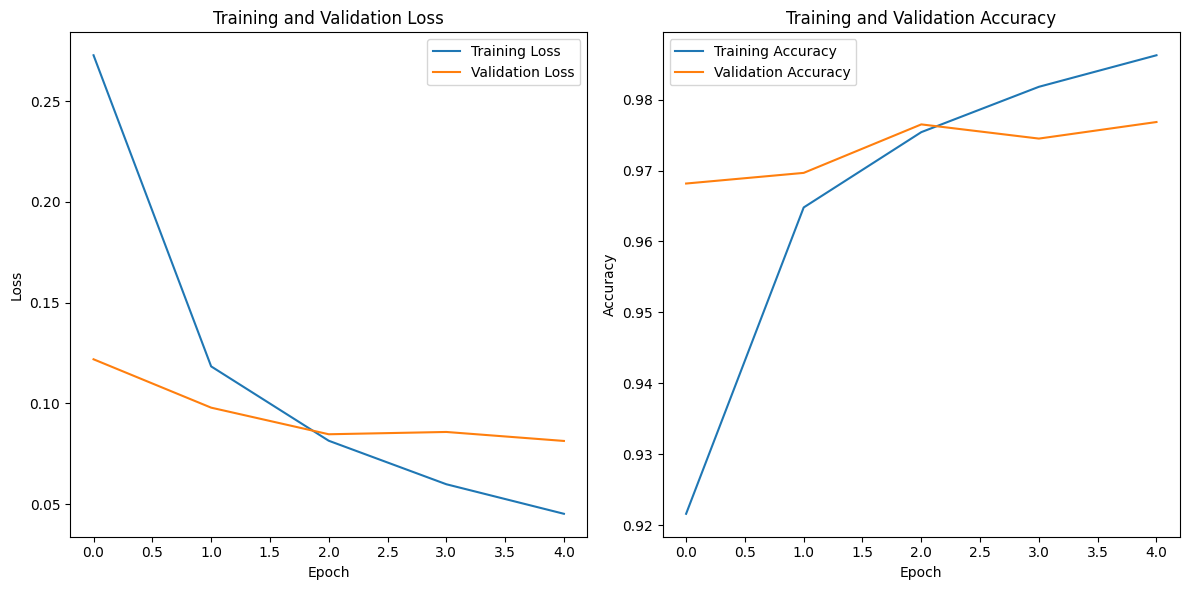

In [101]:
# Create subplots for loss and accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training loss vs. validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Validation Loss')

# Plot training accuracy vs. validation accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

In [98]:


# Show plots
plt.show()

<Figure size 640x480 with 0 Axes>

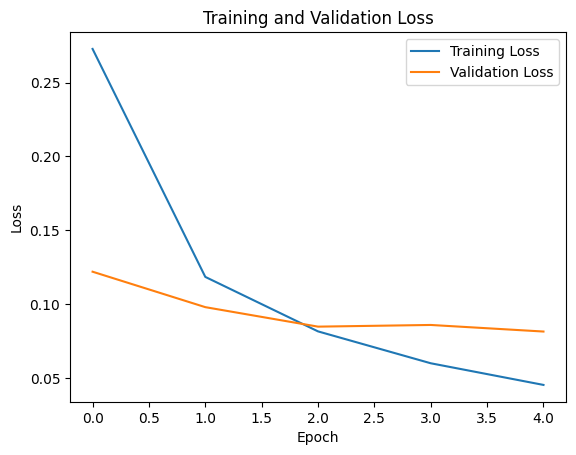

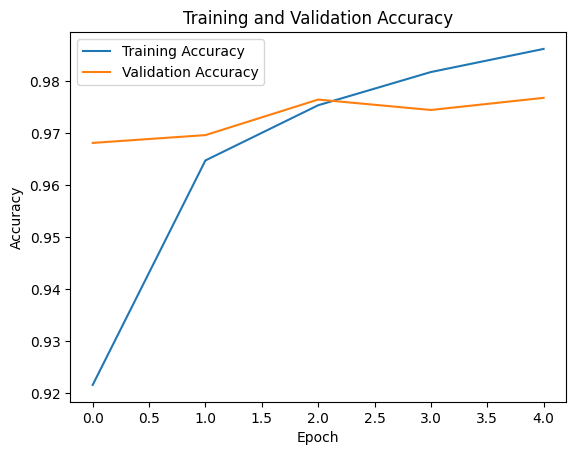

In [90]:
# Plot training loss vs. validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training accuracy vs. validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## Approach 2: Convolutional Neural Network

## Results and Analysis

- FCNN vs CNN performance